# <center>PRÁCTICA 2: APRENDIZAJE SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Albert Doblas Moreno

**Usuario VIU:** albert.doblas

---
# Resumen
---

Esta práctica consta de aplicar modelos de aprendizaje supervisado para un conjunto de datos relativo a casos de Dengue. De una manera similar a la práctica 1, se pretende hacer un tratamiento de los datos previo a la aplicación de los modelos. Además, en este caso se ha hecho una inscripción a la competición DengueAI para testear el mejor modelo seleccionado de las pruebas que se han realizado en la práctica.

A continuación, se describe brevemente los diferentes apartados y lo que se ha pretendido realizar en cada uno de ellos.


*   **Re-Exploración:** Primero se ha una re-exploración de los datos (ya se había hecho en la práctica 1). En este caso se ha centrado en la nueva variable 'número de casos'. Después, se han explorado la tendencia y variación de diferentes características (evoluciones temporales, correlaciones, dispersiones,...)
*   **Predicción**: Después de re-explorar los datos se han aplicado los modelos de machine learning. Estos modelos se han optimizado mediante la optimización de los hiperparámetros para obtener el mejor rendimiento de cada modelo. De esta manera, se describen varios modelos y se comparan para seleccionar el que mejor rinde para la competición.
*   **Conclusiones**: Finalmente, se describen los parámetros de cada modelo y la comparación final, junto con las capturas de pantalla de las submisiones a la competición DengueAI.

---
# Inicialización
---

In [1]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

    return df

def download_predictions(test, pred_total_cases):
  file_name = "practica2_pred_" + time.strftime("%Y") + time.strftime("%m") + time.strftime("%d") + time.strftime("%H") + time.strftime("%M") + time.strftime("%S") + ".csv"
  predictions = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': pred_total_cases})
  with open(file_name, 'w') as f:
    predictions.to_csv(f, index = False)
  files.download(file_name)
  print("Downloaded " + file_name)

In [2]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train_feat = upload_files()
print(train_feat.shape)
train_feat.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
# Subir la variable objetivo total_cases del conjunto de entrenamiento (dengue_labels_train.csv)
train_labels = upload_files()

# Unificar el conjunto de entrenamiento (características + variable objetivo)
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
print(train.shape)
train.head()

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes
(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
# Subir el conjunto de test sin variable objetivo (dengue_features_test.csv)
test = upload_files()
print(test.shape)
test.head()

Saving dengue_features_test.csv to dengue_features_test.csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes
(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


---
# Reexploración
---

Antes de realizar optimización de hiperparámetros y aplicar los algoritmos, se ha hecho una reexploración y un previo preprocesado de los datos. Como en la práctica 1 ya se hizo de manera exhaustiva, en esta práctica el objetivo es visualizar como afectan diferentes parámetros al número de casos de Dengue totales, ya que es la variable que no teníamos en la primera actividad. Sin embargo, antes de nada procederemos a "limpiar" los datos de la misma manera que en la actividad 1: eliminando algunas filas (week_start_date) e contabilizando/imputando valores nulos.

In [5]:
# EJEMPLO: Eliminar variable week_start_date por ser de tipo cadena de texto sin formato
train.drop("week_start_date", axis = 1, inplace = True)
test.drop("week_start_date", axis = 1, inplace = True)

In [6]:
# EJEMPLO: Contar valores perdidos
pd.isnull(train).sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [7]:
# Imputación mediante interpolación linear
train.interpolate(method='linear', inplace=True)
pd.isnull(train).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

In [8]:
# Imputación mediante interpolación linear
test.interpolate(method='linear', inplace=True)
pd.isnull(test).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

Hemos imputado mediante interpolación lineal los valores nulos tanto como para el conjunto de train como el de test.

## Visualización de datos

Como decíamos, vamos a incluir diferentes visualizaciones de los parámetros para poder obtener más información acerca de los datasets utilizados. Primero, vamos a visualizar la matriz de correlación entre las variables.

<ipython-input-15-f5450ca177b7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


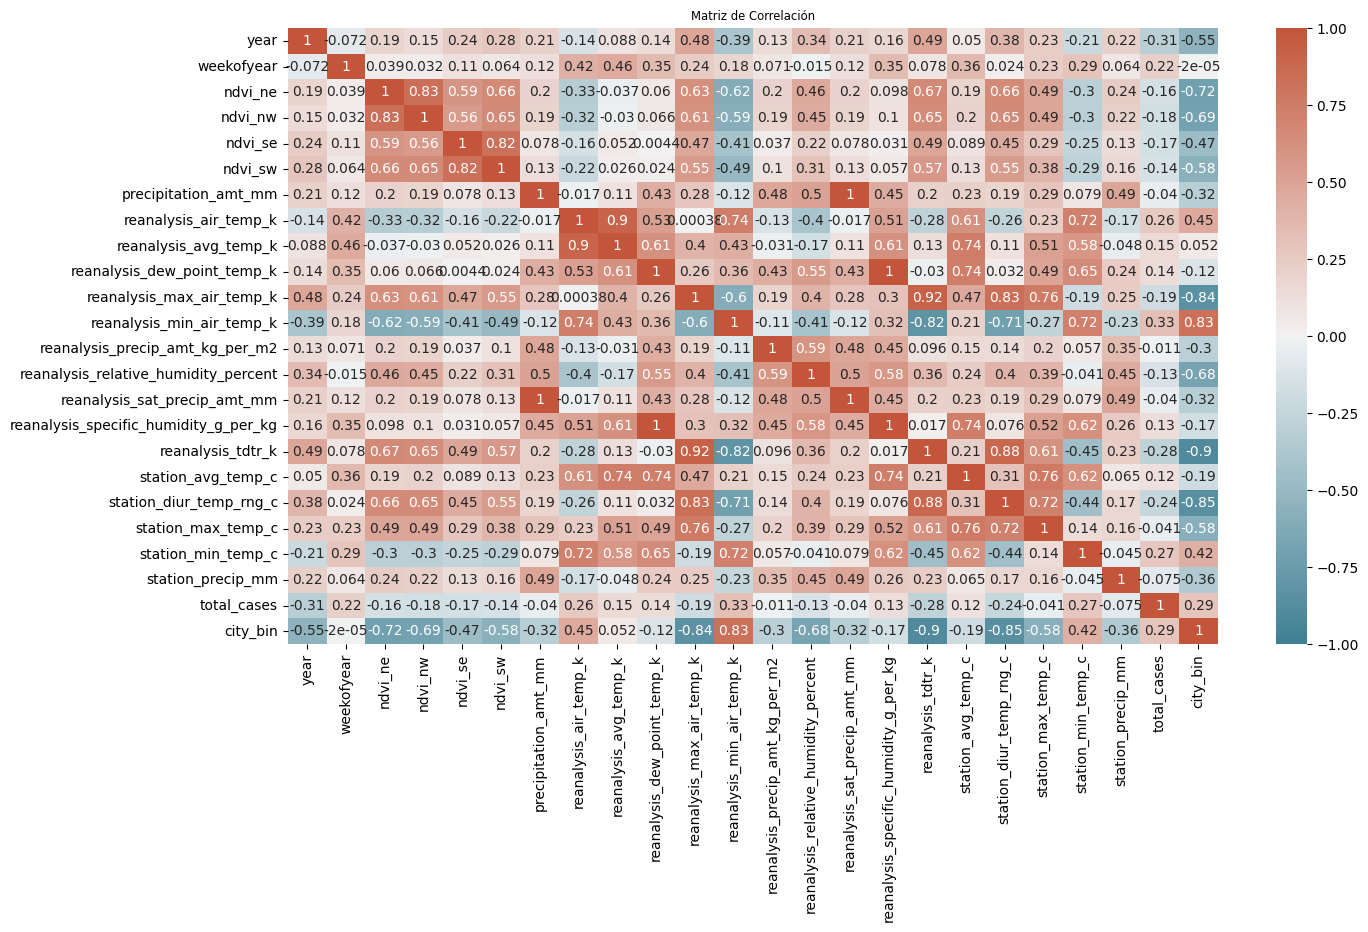

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear una matriz de correlación
correlation_matrix = train.corr()

# Definir colores del mapa de calor
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
sns.set()
sns.set(font_scale=0.7)
plt.title('Matriz de Correlación')
plt.show()

Podemos ver como se correlacionan las características. Esto ya lo vimos en la actividad 1, pero ahora nos interesa como se correlaciona el número total de casos con las características, puesto que tendremos que seleccionar las más adecuadas a la hora de aplicar el modelo y que sea efectivo. Para ello, vamos a definir un umbral de correlación de 0.2, lo cual no es muy alto, dado que no hay muchas características con una correlación muy alta.

In [ ]:
# Seleccionar la variable objetivo y establecer el umbral de correlación
target_variable = 'total_cases'
threshold = 0.2  # Umbral de correlación

# Filtrar las características con correlación superior al umbral
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix[target_variable]) > threshold].tolist()

# Excluir la variable objetivo de la lista
highly_correlated_features.remove(target_variable)

# Mostrar las características altamente correlacionadas
print("Características altamente correlacionadas con '{}' (>|{}|):".format(target_variable, threshold))
print(highly_correlated_features)


Características altamente correlacionadas con 'total_cases' (>|0.2|):
['year', 'weekofyear', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'city_bin']


También podría ser interesante ver el número total de casos a lo largo del tiempo (para ambas ciudades) y establecer algún tipo de patrón. Como vemos, para la ciudad de San Juan hay un decrecimiento bastante claro en el número de casos con los años, mientras que para Iquitos no parece que haya una tendencia clara y el año es bastante irrelevante en el resultado.

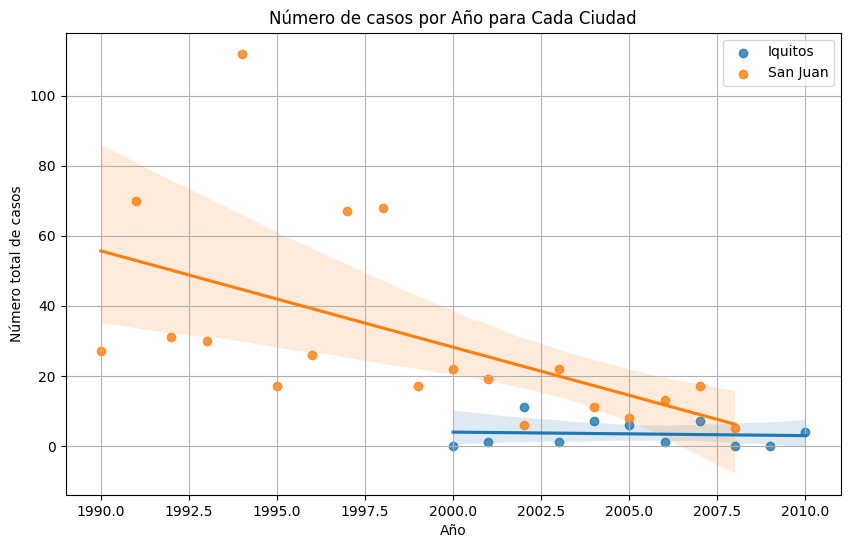

In [ ]:
# Calcular la temperatura media por año para cada ciudad
temp_por_año = train.groupby(['year', 'city'])['total_cases'].last().unstack()

# Graficar la evolución de la temperatura media por año para cada ciudad con scatter plot y línea de tendencia
plt.figure(figsize=(10, 6))

for city in temp_por_año.columns:
    sns.regplot(x=temp_por_año.index, y=temp_por_año[city], scatter=True, label='San Juan' if city == 'sj' else 'Iquitos')

plt.xlabel('Año')
plt.ylabel('Número total de casos')
plt.title('Número de casos por Año para Cada Ciudad')
plt.legend()
plt.grid(True)
plt.show()

Hemos visto como evoluciona el número de casos a lo largo de los años, pero también podría ser relevante ver si hay un efecto en durante un año. Podemos ver como hay un claro pico de casos entre las semanas alrededor de la 40, es decir, en Otoño (en España). También se puede ver como a principios de año hay un cierto repunte. Esto es muy claro para San Juan, para Iquitos también se ve la tendencia pero atenuada.

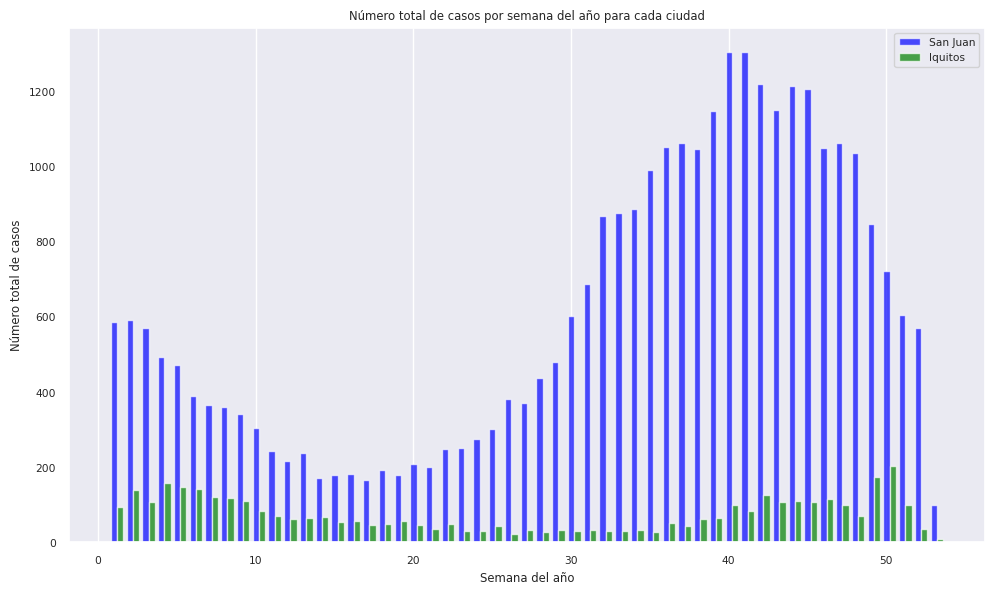

In [ ]:
import matplotlib.pyplot as plt

# Calcular el número total de casos por semana del año para cada ciudad
total_cases_por_semana_sj = train[train['city'] == 'sj'].groupby('weekofyear')['total_cases'].sum()
total_cases_por_semana_iq = train[train['city'] == 'iq'].groupby('weekofyear')['total_cases'].sum()

# Crear gráfico de columnas del número total de casos por semana para cada ciudad
plt.figure(figsize=(10, 6))
plt.bar(total_cases_por_semana_sj.index, total_cases_por_semana_sj, width=0.4, align='center', label='San Juan', color='blue', alpha=0.7)
plt.bar(total_cases_por_semana_iq.index + 0.4, total_cases_por_semana_iq, width=0.4, align='center', label='Iquitos', color='green', alpha=0.7)

plt.xlabel('Semana del año')
plt.ylabel('Número total de casos')
plt.title('Número total de casos por semana del año para cada ciudad')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


¿Cómo afectan las condiciones meteorológicas al Dengue? A pesar que algunas de las características no parecen indicar una correlación muy alta en la matriz, creo que sería interesante verlo gráficamente. La temperatura hemos visto que afecta y lo podemos comprobar en el primer gráfico dado que la mayoría de puntos se colocan en la zona media. Para la humedad y la precipitación, se podrían establecer algun tipo de patrones, pero no parece que sean muy significativos (acorde a la matriz). Quizá una detección avanzada de outliers podría hacer que mejorara...

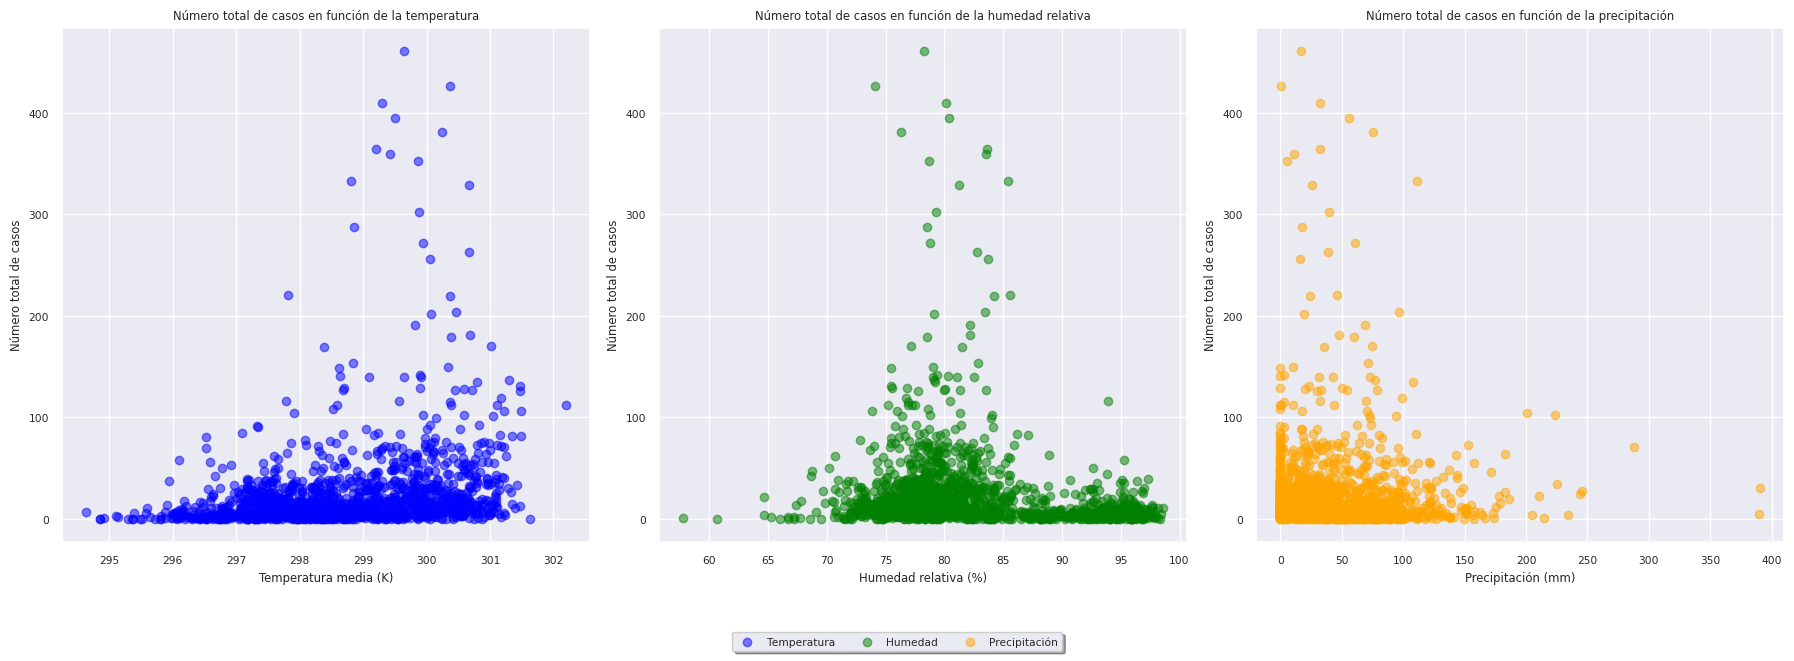

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de dispersión para la temperatura y el número de casos
axs[0].scatter(train['reanalysis_air_temp_k'], train['total_cases'], alpha=0.5, label='Temperatura', color='blue')
axs[0].set_xlabel('Temperatura media (K)')
axs[0].set_ylabel('Número total de casos')
axs[0].set_title('Número total de casos en función de la temperatura')
axs[0].grid(True)

# Gráfico de dispersión para la humedad y el número de casos
axs[1].scatter(train['reanalysis_relative_humidity_percent'], train['total_cases'], alpha=0.5, label='Humedad', color='green')
axs[1].set_xlabel('Humedad relativa (%)')
axs[1].set_ylabel('Número total de casos')
axs[1].set_title('Número total de casos en función de la humedad relativa')
axs[1].grid(True)

# Gráfico de dispersión para la precipitación y el número de casos
axs[2].scatter(train['precipitation_amt_mm'], train['total_cases'], alpha=0.5, label='Precipitación', color='orange')
axs[2].set_xlabel('Precipitación (mm)')
axs[2].set_ylabel('Número total de casos')
axs[2].set_title('Número total de casos en función de la precipitación')
axs[2].grid(True)

# Añadir una única leyenda con los colores correspondientes
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)
plt.tight_layout()
plt.show()

## Preparación de los datos para aplicar algoritmos

Primero pasamos a categorizar la variable city en 0-1, para evitar strings en el dataset. Luego, seleccionaremos las variables más significativas para ahorrar tiempo de computación gracias a la matriz de correlación previa. Finalmente, normalizaremos el conjunto de datos de entreno, de test y los valores de número de casos.

In [9]:
#Binarizador para la variable categórica city en el conjunto de entrenamiento y test
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])

train.tail()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
1451,iq,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,0
1452,iq,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,0
1453,iq,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,0
1454,iq,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,0
1455,iq,2010,25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,...,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4,0


In [10]:
# selección de características acorde con la matriz de correlación
selected_features  = ['year', 'weekofyear', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'city_bin']


In [14]:
# EJEMPLO: Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[selected_features])
X_test = scaler.transform(test[selected_features])
y_train = train['total_cases']
X_test

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:', y_train)

X_train: (1456, 8)
X_test: (416, 8)
y_train: 0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64


---
# Predicción
---

Pasamos a la parte más importante del trabajo: aplicar algoritmos de machine learning para predecir los casos de Dengue. En esta práctica se describen diferentes tipos de algoritmos con una optimización de hiperparámetros previa, lo cual es beneficioso para así optimizar el resultado de la predicción. Los algoritmos utilizados son:


*   Random Forest
*   K-Nearest Neighbors (kNN)
*   Árboles de decisión
*   Support Vector Machine (SVM)
*   Gradient Boosting

Los cuales se han optimizado utilizando diferentes técnicas como RandomizedSearch o GridSearchCV









## Random Forest


El primer algoritmo que se presenta es el Random Forest, el cual es un algoritmo de aprendizaje supervisado que combina múltiples árboles de decisión, generando predicciones más precisas al promediar los resultados individuales, reduciendo el sobreajuste y aumentando la robustez del modelo.

Se han utilizado las dos técnicas de optimización: RandomizedSearch y GridSearcCV.  GridSearchCV es exhaustivo pero puede ser costoso computacionalmente, mientras que RandomizedSearchCV es más eficiente al seleccionar aleatoriamente combinaciones de hiperparámetros para explorar el espacio de búsqueda. Veremos qué obtenemos con cada una aplicándolo al Random Forest...

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=0)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 800],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 40],  # Mínimo de muestras requeridas para dividir un nodo interno
}

# Inicializar Randomized Search con el modelo y el espacio de búsqueda
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100,
                                   cv=5, scoring='neg_mean_absolute_error', random_state=0, n_jobs=-1)

# Entrenar Randomized Search para encontrar los mejores hiperparámetros
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 40, 'max_depth': 10}


In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=0)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 800],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 40],  # Mínimo de muestras requeridas para dividir un nodo interno
}

# Inicializar Grid Search con el modelo y el espacio de búsqueda
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Entrenar Grid Search para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 40, 'n_estimators': 200}


¡Pues nos da el mismo resultado! A pesar que hemos definido un random_state=0 para que el profesor pueda reproducir los mismos resultados, es probable que se encuentren diferentes parámetros cada vez que se ejecute... Por lo tanto, vemos que con RandomizedSearch obtenemos resultados similares (incluso el mismo en este caso) con menos tiempo de cómputo. Sin embargo, para practicar, se harán dos optimizaciones con cada uno (si fuera un trabajo "real", intentaríamos optimziar el procedimiento!)

Pasamos ahora a utilizar los resultados obtenidos para evaluar el modelo y poder compararlo después con otros mediante el MAE (mean absolute error). Se divide el conjunto de entrenamiento y validación para poder compararlo y se define un tamaño de test del 20% (se mantendrá en todos los algoritmos para asegurar la homogeneidad de resultados).

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# División de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Creación del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=40, random_state=0, max_depth=10)

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
predictions = rf_model.predict(X_val)

# Evaluación del modelo
rf_mae = mean_absolute_error(y_val, predictions)
print("MAE:", rf_mae)


MAE: 14.506945796231255


¿Y si modificamos nosotros los datos? ¿Obtendremos mejores resultados? Vamos a intentarlo... Haciendo un poco de "prueba y error" podemos obtener mejores resultados, como vemos más adelante. Esto se debe a qué también podríamos mejorar el "optimizado", a parte que nunca va a ser una ciencia exacta y siempre tenemos que trabajar nosotros en optimizar al máximo el modelo.


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# División de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Creación del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, min_samples_split=10, random_state=0, max_depth=None)

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
predictions = rf_model.predict(X_val)

# Evaluación del modelo
rf2_mae = mean_absolute_error(y_val, predictions)
print("MAE:", rf2_mae)

MAE: 12.672641448370038


Como vemos, el MAE es menor y por tanto, de momento, será el algoritmo elegido para presentarlo a la competición.

### Predicción final

Hemos optimizado parámetros para obtener el mejor modelo según el MAE. Ahora lo que hacemos es aplicar el modelo al conjunto (sin separar test-train) y obtenemos la predicción. Después, descargamos los archivos para poder introducirlos en la competición y obtener el MAE de DengAI.

In [ ]:
# Creación del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=800, min_samples_split=5, random_state=0, max_depth=None)
rf_model.fit(X_train, y_train)

# Realizar prediccones
rf_predicted = rf_model.predict(X_test)


In [ ]:
# EJEMPLO: Redondear el resultado y convertirlo a entero
y = np.rint(rf_predicted) # round
y = y.astype(int) # cast to int
res = np.hstack(y)
print(res.shape)

# EJEMPLO: Cambiar valores negativos a cero
res[rf_predicted < 0] = 0

(416,)


In [ ]:
download_predictions(test, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231116144212.csv


Aquí hemos comparado diferentes optimizaciones según el MAE que se describe en esta práctica, que no es el mismo que se obtiene en la competición (nos falta el archivo).

## kNN

K-Nearest Neighbors Regressor (KNN): Utiliza los valores de las k instancias más cercanas para hacer predicciones. De la misma manera que con los Random Forest, vamos a optimizar hiperparámetros para encontrar el mejor rendimiento del modelo (en este caso GridSearchCV).

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Definir los hiperparámetros a explorar en la búsqueda de cuadrícula
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Crear el modelo KNN
knn_model = KNeighborsRegressor()

# Realizar la búsqueda de cuadrícula para optimizar hiperparámetros
grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo y sus hiperparámetros
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Calcular las predicciones con el mejor modelo
knn_predictions = best_knn_model.predict(X_test)


Mejores hiperparámetros: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [ ]:

# División de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Creación del modelo de Random Forest
knn_model = KNeighborsRegressor(n_neighbors=3, weights='distance', p=1)

# Entrenamiento del modelo
knn_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
knn_predictions = knn_model.predict(X_val)

# Evaluación del modelo
knn_mae = mean_absolute_error(y_val, knn_predictions)
print("MAE:", knn_mae)

MAE: 13.644378088828049


Pues obtenemos un resultado similar a usar el Random Forest, pero sigue sin dar un MAE más bajo en este caso. Podríamos hacer "prueba y error", usar otra optimización, una optimización más avanzada... Se podría mejorar este resultado, pero vamos analizar otros modelos!

## Árboles de decisión

El algoritmo de árbol de decisión es un solo árbol utilizado para predecir, mientras que Random Forest es un conjunto de múltiples árboles que trabajan en conjunto para obtener una predicción más robusta y precisa. Por lo tanto, no esperamos tener un resultado mejor que con un Random Forest...

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Definir los hiperparámetros a explorar en la búsqueda de cuadrícula para árboles de decisión
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=0)

# Realizar la búsqueda de cuadrícula para optimizar hiperparámetros
grid_search = GridSearchCV(tree_model, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_tree_model = grid_search.best_estimator_
best_params_tree = grid_search.best_params_

# Calcular las predicciones con el mejor modelo de árbol de decisión
tree_predictions = best_tree_model.predict(X_test)

print("Mejores hiperparámetros para el árbol de decisión:", best_params_tree)


Mejores hiperparámetros para el árbol de decisión: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# División de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.6, random_state=0)

# Creación del modelo de Random Forest
tree_model = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_leaf=4, min_samples_split=10)

# Entrenamiento del modelo
tree_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
tree_predictions = tree_model.predict(X_val)

# Evaluación del modelo
tree_mae = mean_absolute_error(y_val, tree_predictions)
print("MAE:", tree_mae)

MAE: 19.539480174310132


Como esperábamos, el resultado es peor que usando un Random Forest y kNN. Sin embargo, es un modelo más simple y quizá podría ser útil para aplicaciones más sencillas o si no necesitamos un modelo muy preciso.

## SVM

El algoritmo Support Vector Machine (SVM) busca encontrar una función que se ajuste a los datos, minimizando la suma de errores y permitiendo un margen de tolerancia para puntos que no se ajustan perfectamente. Este algoritmo nos puede ser útil tanto como para clasificación como regresión (nuestro caso). Optimizamos con RandomizedSearchCV...

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Definir el modelo de SVM para regresión
svm_model = SVR()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': uniform(loc=0, scale=10),  # Parámetro de regularización
    'gamma': ['scale', 'auto']      # Coeficiente del kernel ('scale' es por defecto)
}

# Inicializar Randomized Search con el modelo y el espacio de búsqueda
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid, n_iter=100,
                                       cv=5, scoring='neg_mean_absolute_error', random_state=0, n_jobs=-1)

# Entrenar Randomized Search para encontrar los mejores hiperparámetros
random_search_svm.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_svm.best_params_)

# Obtener el modelo con los mejores hiperparámetros
best_svm_model = random_search_svm.best_estimator_

# Realizar predicciones con el mejor modelo
predictions_svm = best_svm_model.predict(X_test)


Mejores hiperparámetros: {'C': 3.453516806969027, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# División de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Creación del modelo SVR

svm_model = SVR(C=3.453516806969027, gamma = 'scale', kernel= 'rbf')
# Entrenamiento del modelo
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
svm_predictions = svm_model.predict(X_val)

# Evaluación del modelo
svm_mae = mean_absolute_error(y_val, svm_predictions)
print("MAE:", svm_mae)

MAE: 16.61948199680332


... y vemos que el MAE sigue siendo mayor que en el caso del Random Forest y el kNN, pero es mejor que un árbol de decisión.

## Gradient Boosting

Finalmente, vamos aplicar el algoritmo Gradient Boosting, el cual es un método de ensamble que construye múltiples árboles de decisión de forma secuencial, cada uno corrigiendo los errores del modelo anterior, minimizando el error residual. De nuevo, optimizamos con RandomizedSearchCV...

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo de Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=0)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400],   # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6],              # Profundidad máxima del árbol
}

# Inicializar Randomized Search con el modelo y el espacio de búsqueda
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid, n_iter=100,
                                      cv=5, scoring='neg_mean_absolute_error', random_state=0, n_jobs=-1)

# Entrenar Randomized Search para encontrar los mejores hiperparámetros
random_search_gb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search_gb.best_params_)

# Obtener el modelo con los mejores hiperparámetros
best_gb_model = random_search_gb.best_estimator_

# Realizar predicciones con el mejor modelo
predictions_gb = best_gb_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error



# División de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Creación del modelo

gradient_model = GradientBoostingRegressor(random_state=0, n_estimators=300, max_depth=3, learning_rate=0.01)

# Entrenamiento del modelo
gradient_model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
gradient_predictions = gradient_model.predict(X_val)

# Evaluación del modelo
gradient_mae = mean_absolute_error(y_val, gradient_predictions)
print("MAE:", gradient_mae)

MAE: 13.903285400540078


Y obtenemos un MAE de 13.90! Parece que el Random Forest es nuestro mejor modelo!! (el optimizado final). Sin embargo, he creído necesario y conveniente enviar otro modelo diferente a Driven Data para comprobar que el MAE definido en este script funciona correctamente... En la siguiente sección se detallará con más precision esta comparación.

Aplicamos el modelo con lo

In [ ]:
# Creación del modelo
grad_boosting_model = GradientBoostingRegressor(random_state=0, n_estimators=300, max_depth=3, learning_rate=0.01)
grad_boosting_model.fit(X_train, y_train)

# Realizar prediccones
grad_boosting_predicted = grad_boosting_model.predict(X_test)

In [ ]:
# EJEMPLO: Redondear el resultado y convertirlo a entero
y = np.rint(grad_boosting_predicted) # round
y = y.astype(int) # cast to int
res = np.hstack(y)
print(res.shape)

# EJEMPLO: Cambiar valores negativos a cero
res[grad_boosting_predicted < 0] = 0

(416,)


In [ ]:
download_predictions(test, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231116072056.csv


---
# Conclusiones
---

Pasamos a las conclusiones del trabajo. Para empezar, vamos a resumir los resultados MAE de cada modelo:

In [ ]:
# MAE de cada modelo
print("Resultados MAE para cada modelo:")
print("-----------------------------------")
print("\nRandom Forest:", rf2_mae.round(4))
print("\nkNN:", knn_mae.round(4))
print("\nArbol de decision:", tree_mae.round(4))
print("\nSVM: ", svm_mae.round(4))
print("\nGradient Boosting:", gradient_mae.round(4))
print("-----------------------------")

Resultados MAE para cada modelo:
-----------------------------------

Random Forest: 12.6726

kNN: 13.6444

Arbol de decision: 19.5395

SVM:  16.6195

Gradient Boosting: 13.9033
-----------------------------


Como habíamos visto anteriormente, el random forest (optimizado "a dedo") ha sido el que mejor nota ha obtenido y veremos ahora que también en la web de DrivenData.

Como conclusiones finales del trabajo en sí, creo que ha sido muy interesante el poder aplicar varios modelos de aprendizaje supervisado al dataset, además de poder ver los gráficos iniciales de cómo depende el número de casos según las variables. Tengo que reconocer, que me gustaría haber podido dedicar más tiempo a optimizar todos los modelos y obtener mejores resultados en la competición, hay muchísimas variables que se pueden variar (valga la redundancia). Sin embargo, creo que la práctica refleja en buena medida lo que los profesores pretendían.

---
# Competición
---

Para terminar, se muestra una tabla-resumen con los algoritmos enviados a DrivenData y sus parámetros/descripción (interesante ver como el MAE de validación que se ha usado no siempre refleja el mismo resultado que en DrivenData...)

| Modelo | MAE test (DrivenData) | MAE validación | Algoritmo | Hiperparámetros | Descripción
| --- | --- | --- | --- | --- | --- |
| Prueba 4 - Random Forest | 26,7139 | 12,6726 | Random Forest | n_estimators=1000, min_samples_split=10, max_depth=None | Optimizado prueba y error (después de aplicar optimización avanzada)
| Prueba 5 - Random Forest | 26,8005 | 11,9143 | Random Forest | n_estimators=800, min_samples_split=10, max_depth=None | Optimizado prueba y error (después de aplicar optimización avanzada)
| Prueba 3 - Random Forest | 29,9423 | 14,5069 | Random Forest | n_estimators=200, min_samples_split=40, max_depth=10 | Optimizado con GridSearchCV y RandomizedSearch
| Prueba 2 - Random Forest | 30,0313 | 14,7011 | Random Forest | n_estimators=200, min_samples_split=40, max_depth=10 | Optimizado con GridSearchCV y RandomizedSearch (sin optimizar características)
| Prueba 1 - Random Forest | 30,5168 | 17,2523 | Random Forest | n_estimators=600, min_samples_split=10, max_depth=None | Sin optimizar, aplicando variables aleatorias
| Prueba 1 - Gradient Boosting | 32,3053 | 13,9033 | Gradient Boosting | n_estimators=300, max_depth=3, learning_rate=0.01 | Optimizado con RandomizedSearch

Se ve como el MAE validación no acaba de predecir del todo bien el resultado que se obtendrá con Driven Data... De hecho, el modelo de Gradient Boosting nos arroja un MAE validación de 13,90, que es mejor que el de 14,50 de la prueba 3 de random forest, por lo que creía que obtendría un mejor MAE en DrivenData. Quería enviar un modelo diferente para comprobar esto, ya que no me terminaba de fiar... Finalmente, se modificaron los hiperparámetros del Random Forest que era el que mejor MAE tenía para acabar con un MAE de 26,7139, que entra dentro de unos parámetros medios. Como he dicho anteriormente, se podría haber optimizado todavía más este modelo, pero por falta de tiempo no ha podido ser (también podría haber optimizado otros y probarlos...). También se podría optimizar la lista de características incluyendo más (incluso el dataset entero), pero creo que las elegidas reflejan en un gran porcentaje el resultado (a parte de ahorrar tiempo de cómputo).


**Modelo final elegido**
* Nombre/Identificador: Prueba 4 - Random Forest
* MAE test (DrivenData): 26,7139
* MAE validación: 12,6726
* Algoritmo ML: Random Forest
* Hiperparámetros: n_estimators=1000, min_samples_split=10, max_depth=None
* Lista de características: ['year', 'weekofyear', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'city_bin']
* Resumen del dataset (transformaciones aplicadas, etc.): Selección de características principales apoyado en matriz de correlación, hiperparámetros optimizados para obtener el mejor MAE después de optimizar con GridSearchCV y RandomizedSearch.

***Captura de pantalla con las submisiones:***

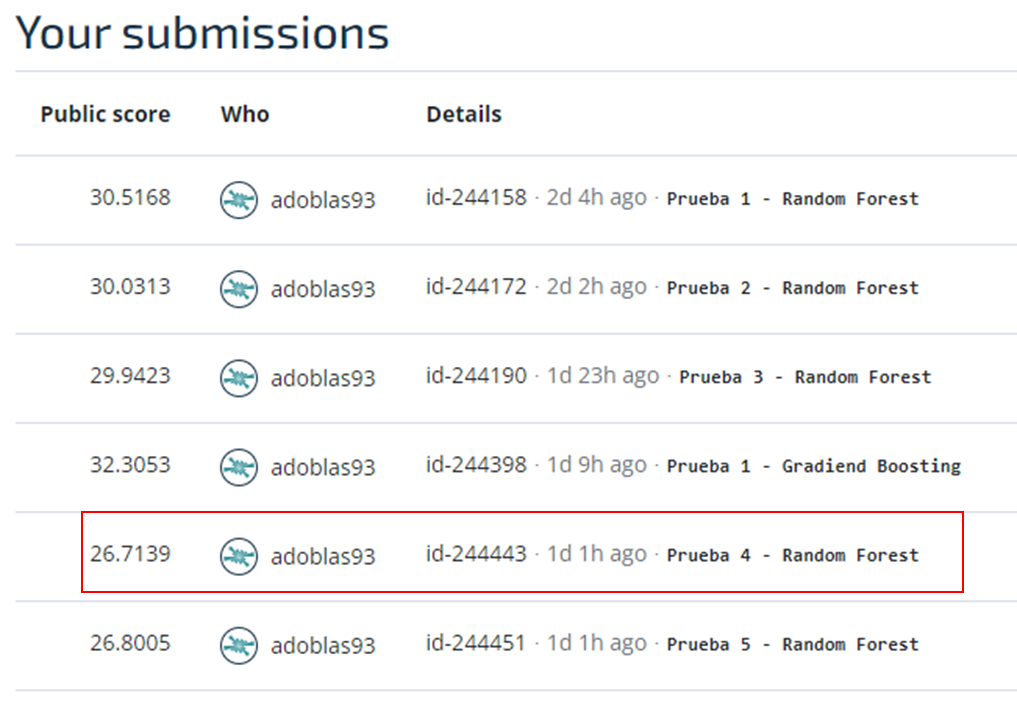